## Welcome to my notebook :)
This is some python code.

In [2]:
print('hello world')

hello world


In [3]:
[n**2 for n in range(2,6)]

[4, 9, 16, 25]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO  # got moved to io in python3.

import requests
# LOAD DATA FROM GOOGLE SHEETS!
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1rRpLuki4z1lr5_2FJblsztvVvCDbK8R3z_Qn_d8VmQU&output=csv')
data = r.content.decode('utf-8')

pd.__version__

'0.19.0'

In [25]:
%matplotlib inline #DISPLAY GRAPHS INLINE

In [16]:
r.content # CSV FORMAT

b'account number,name,sku,category,quantity,unit price,ext price,date\r\n296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 7:13:03\r\n98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 2:10:44\r\n563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24\r\n93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.4,2013-11-17 20:41:11\r\n659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 8:14:27'

In [17]:
# PANDAS
sales = pd.read_csv(StringIO(data), index_col=0, parse_dates=['date']) 
sales.head()

,name,sku,category,quantity,unit price,ext price,date
account number,,,,,,,
296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [18]:
sales['unit price'].describe()

count     5.00000
mean     60.91600
std      30.19767
min      24.16000
25%      44.48000
50%      53.62000
75%      82.68000
max      99.64000
Name: unit price, dtype: float64

In [19]:
sales.dtypes

name                  object
sku                   object
category              object
quantity               int64
unit price           float64
ext price            float64
date          datetime64[ns]
dtype: object

In [20]:
customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
account number,,,
296809,Carroll PLC,578.24,2014-09-27 07:13:03
98022,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
563905,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
93356,Waters-Walker,413.40,2013-11-17 20:41:11
659366,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


In [21]:
customer_group = customers.groupby('name')
customer_group.size()

name
Carroll PLC                      1
Heidenreich-Bosco                1
Kerluke, Reilly and Bechtelar    1
Waelchi-Fahey                    1
Waters-Walker                    1
dtype: int64

In [22]:
sales_totals = customer_group.sum()
sales_totals.sort(columns='ext price').head()

/Users/nathann/code/tweet/env/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,ext price
name,
"Kerluke, Reilly and Bechtelar",289.92
Waters-Walker,413.40
Carroll PLC,578.24
Heidenreich-Bosco,1018.78
Waelchi-Fahey,1793.52


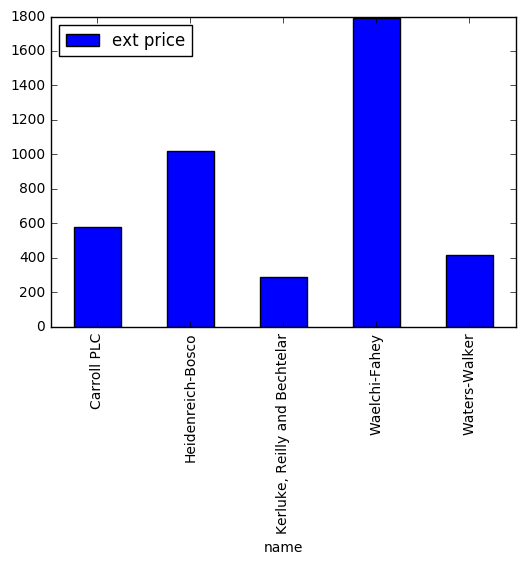

In [26]:
my_plot = sales_totals.plot(kind='bar')